In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x_set = np.array([1,2,3,4,5,6])

In [4]:
def f(x):
    if x in x_set:
        return x/21
    else:
        return 0

In [5]:
X = [x_set,f]

In [6]:
prob = np.array([ f(x_k)  for x_k in x_set])
prob

array([0.04761905, 0.0952381 , 0.14285714, 0.19047619, 0.23809524,
       0.28571429])

In [7]:
dict(zip(x_set,prob))

{1: 0.047619047619047616,
 2: 0.09523809523809523,
 3: 0.14285714285714285,
 4: 0.19047619047619047,
 5: 0.23809523809523808,
 6: 0.2857142857142857}

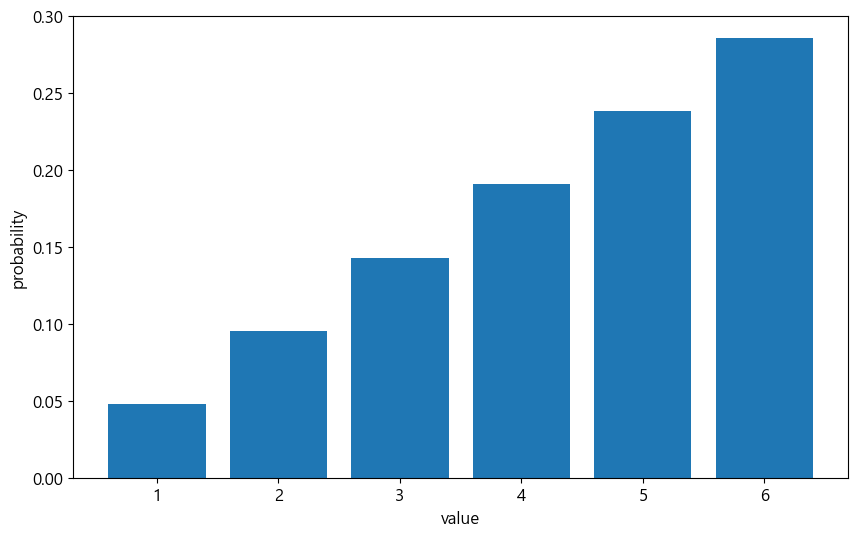

In [8]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.bar(x_set,prob)
ax.set_xlabel('value')
ax.set_ylabel('probability')
plt.show()

In [9]:
np.all(prob >= 0)

True

In [10]:
np.sum(prob)

0.9999999999999999

In [11]:
def F(x):
    return np.sum([ f(x_k) for x_k in x_set if x_k <= x])

In [12]:
F(3)

0.2857142857142857

In [13]:
y_set = np.array([ 2*x_k+3  for x_k in x_set])
y_set

array([ 5,  7,  9, 11, 13, 15])

In [14]:
prob = np.array([ f(x_k)  for x_k in x_set])
dict(zip(y_set,prob))

{5: 0.047619047619047616,
 7: 0.09523809523809523,
 9: 0.14285714285714285,
 11: 0.19047619047619047,
 13: 0.23809523809523808,
 15: 0.2857142857142857}

In [15]:
np.sum([ x_k * f(x_k)  for x_k in x_set])

4.333333333333333

In [19]:
sample = np.random.choice(x_set,1000000,p=prob)
np.mean(sample)

4.333559

In [21]:
def E(X,g=lambda x : x):
    x_set,f = X
    return np.sum([ g(x_k) * f(x_k)  for x_k in x_set])

In [22]:
X

[array([1, 2, 3, 4, 5, 6]), <function __main__.f(x)>]

In [23]:
E(X)

4.333333333333333

In [24]:
E(X,g=lambda x: 2*x+3)

11.666666666666664

In [25]:
2*E(X)+3

11.666666666666666

In [26]:
mean = E(X)
np.sum([ (x_k - mean)**2 * f(x_k) for x_k in x_set])

2.2222222222222223

In [27]:
def V(X,g=lambda x: x):
    x_set,f = X
    mean = E(X,g)
    return np.sum([ (g(x_k)-mean)**2 * f(x_k)  for x_k in x_set])

In [28]:
V(X)

2.2222222222222223

In [29]:
V(X,lambda x: 2*x+3)

8.88888888888889

In [30]:
2**2*V(X)

8.88888888888889

In [31]:
x_set = np.arange(2,13)
y_set = np.arange(1,7)
x_set,y_set

(array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 array([1, 2, 3, 4, 5, 6]))

In [46]:
def f_XY(x,y):
    if 1 <= y <= 6 and 1 <= x-y <= 6:
        return y*(x-y)/441
    else:
        return 0

In [47]:
XY = [x_set,y_set,f_XY]

In [48]:
prob = np.array([[ f_XY(x_i,y_j) for y_j in y_set ] for x_i in x_set ])

In [49]:
1/441

0.002

In [50]:
prob

array([[0.002, 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.005, 0.005, 0.   , 0.   , 0.   , 0.   ],
       [0.007, 0.009, 0.007, 0.   , 0.   , 0.   ],
       [0.009, 0.014, 0.014, 0.009, 0.   , 0.   ],
       [0.011, 0.018, 0.02 , 0.018, 0.011, 0.   ],
       [0.014, 0.023, 0.027, 0.027, 0.023, 0.014],
       [0.   , 0.027, 0.034, 0.036, 0.034, 0.027],
       [0.   , 0.   , 0.041, 0.045, 0.045, 0.041],
       [0.   , 0.   , 0.   , 0.054, 0.057, 0.054],
       [0.   , 0.   , 0.   , 0.   , 0.068, 0.068],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.082]])

In [52]:
prob.shape

(11, 6)

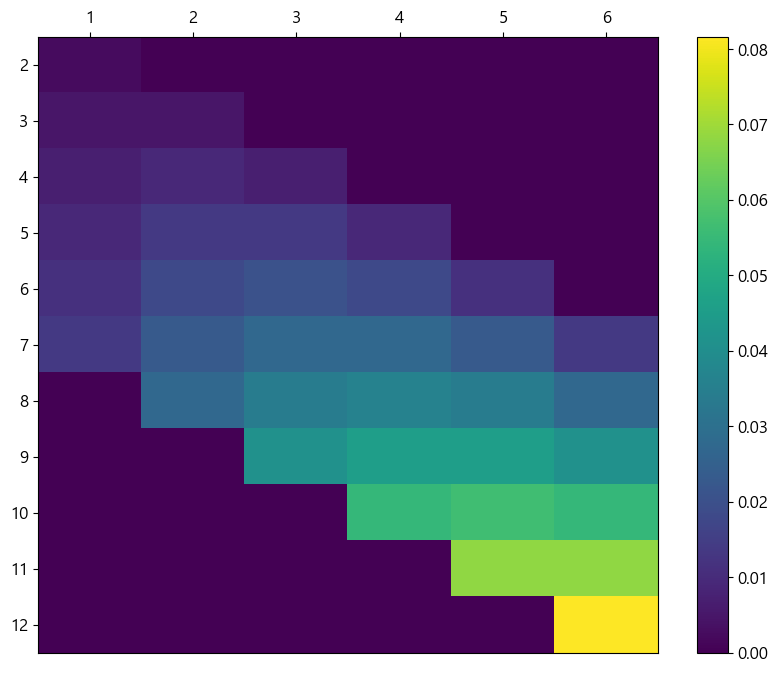

In [56]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

c = ax.pcolor(prob)
ax.set_xticks(np.arange(prob.shape[1]) + 0.5 , minor=False)
ax.set_yticks(np.arange(prob.shape[0]) + 0.5 , minor=False)
ax.set_xticklabels(np.arange(1,7), minor=False)
ax.set_yticklabels(np.arange(2,13), minor=False)
ax.invert_yaxis()
ax.xaxis.tick_top()
fig.colorbar(c,ax=ax)
plt.show()

In [57]:
np.all(prob >= 0)

True

In [58]:
np.sum(prob)

1.0

In [59]:
def f_X(x):
    return np.sum([ f_XY(x,y_k) for y_k in y_set])

def f_Y(y):
    return np.sum([ f_XY(x_k,y) for x_k in x_set])

In [60]:
X = [x_set, f_X]
y = [y_set, f_Y]

In [61]:
prob_x = np.array([ f_X(x_k)  for x_k in x_set])
prob_y = np.array([ f_Y(y_k)  for y_k in y_set])

In [62]:
prob_x

array([0.002, 0.009, 0.023, 0.045, 0.079, 0.127, 0.159, 0.172, 0.166,
       0.136, 0.082])